LOUVAT Charles

MOHAMED Ben-Hazem

---


Les machines à vecteurs de support (SVM : Support Vector Machines) sont une classe de méthodes d’apprentissage statistique basées sur le principe de la maximisation de la marge (séparation des classes). Il existe plusieurs formulations (linéaires, versions à noyaux) qui peuvent s’appliquer sur des données séparables (linéairement) mais aussi sur des données non séparables.

Les avantages des SVM :
    
- Très efficaces en dimension élevée.
- Ils sont aussi efficaces dans le cas où la dimension de l’espace serait plus grande que le nombre d’échantillons d’apprentissage.
- Pour la décision, n’utilisent pas tous les échantillons d’apprentissage, mais seulement une partie (les vecteurs de support). En conséquence, ces algorithmes demandent moins de mémoire.

Désavantages :

- Si le nombre d’attributs est beaucoup plus grand que le nombre d’échantillons, les performances sont moins bonnes.
- Comme il s’agit de méthodes de discrimination entre les classes, elles ne fournissent pas d’estimations de probabilités

# Jeu de données Diabetes

-----------------------------------------------------------------------------

## SVM Linéaire

Dans Scikit-learn, les SVM sont implémentées dans le module sklearn.svm. Dans cette partie nous allons nous intéresser à la version linéaire (Scikitlearn utilise les bibliothèques libLinear et libSVM).

Nous allons utiliser le jeu de donné "diabetes.csv" déjà rencontré dans la séance précédente. Pour pouvoir afficher les résultats on va utiliser seulement deux attributs, en commençant par les plus importants (vus dans le TP4).

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('diabetes.csv', sep = ",")
df = data.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Comme pour le TP4, nous remplaçons les valeurs nulles par la médiane dans les trois variables ci-dessous.

In [80]:
df['SkinThickness'] = df['SkinThickness'].replace(0, df['Insulin'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())

Nous pouvons maintenant afficher le pairplot afin de voir quelles sont les paires qui peuvent être séparées linéairement.

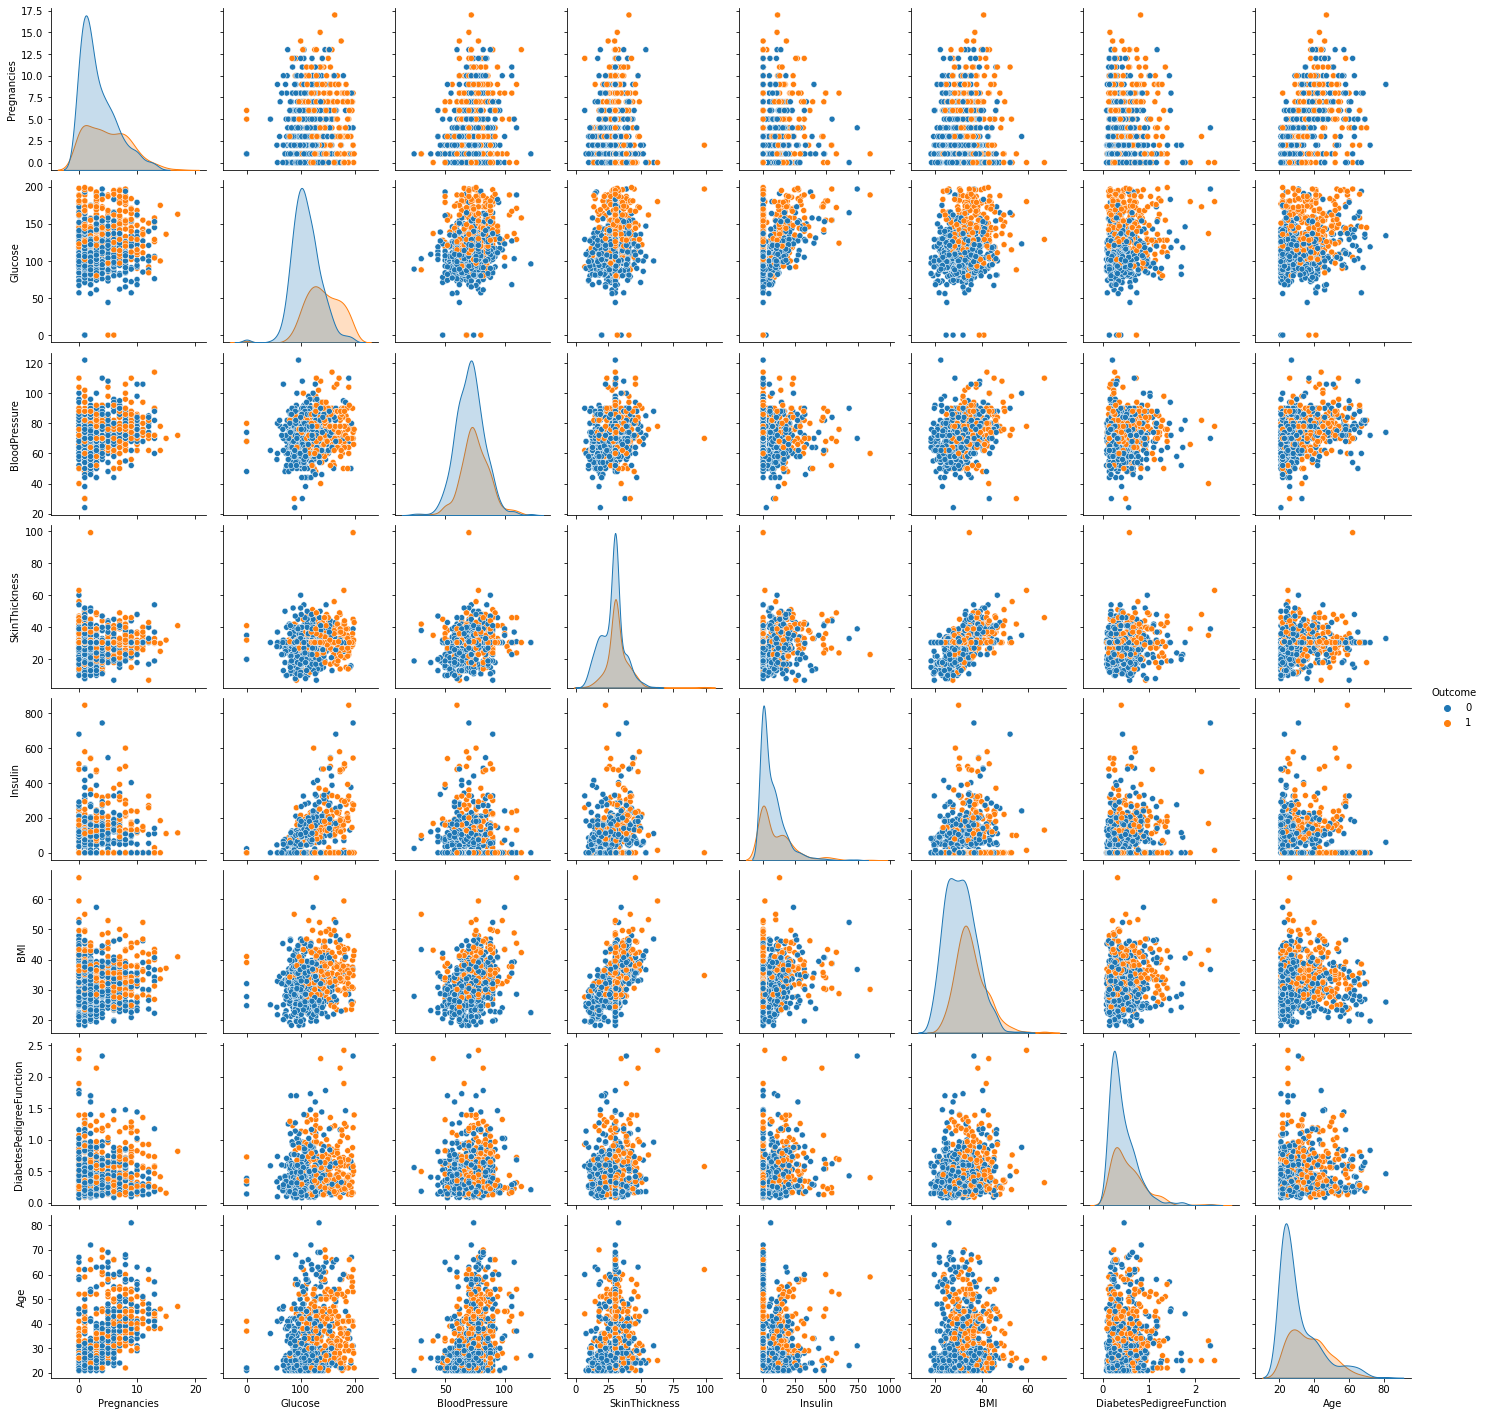

In [86]:
sns.pairplot(data=df, hue='Outcome')

Nous choisissons donc les paires suivantes :

- Glucose/BloodPressure
- Glucose/SkinThickness
- Glucose/BMI
- Glucose/DiabetesPedigreeFunction
- Glucose/Age

**Question:**

**Calculez le score d’échantillons bien classifiés sur le jeu de données de tests.**

In [87]:
t = ['BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age']

for i in range(len(t)):
    X = data[['Glucose',t[i]]]
    y = data['Outcome']    
    
    # On conserve 50% du jeu de données pour l'évaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=0)
    
    C = 1.0 # paramètre de régularisation
    lin_svc = svm.LinearSVC(C = C, random_state = 0)
    lin_svc.fit(X_train, y_train)
    print(f"Paires : {X.columns.tolist()} \nScore test: {lin_svc.score(X_test, y_test)}\n\n")

Paires : ['Glucose', 'BloodPressure'] 
Score test: 0.6875


Paires : ['Glucose', 'SkinThickness'] 
Score test: 0.6588541666666666


Paires : ['Glucose', 'BMI'] 
Score test: 0.6588541666666666


Paires : ['Glucose', 'DiabetesPedigreeFunction'] 
Score test: 0.3463541666666667


Paires : ['Glucose', 'Age'] 
Score test: 0.6588541666666666




Nous allons tester en  **standardisant** les données.

In [88]:
t = ['BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age']

for i in range(len(t)):
    X = data[['Glucose',t[i]]]
    y = data['Outcome']
    
    #Normaliser les caractéristiques en supprimant la moyenne et en mettant à l'échelle la variance unitaire.
    scaler = StandardScaler()
    X_scale = scaler.fit_transform(X)
    
    # On conserve 50% du jeu de données pour l'évaluation
    X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.5,random_state=0)
    
    C = 1.0 # paramètre de régularisation
    lin_svc = svm.LinearSVC(C = C, random_state = 0)
    lin_svc.fit(X_train, y_train)
    print(f"Paires : {X.columns.tolist()} \nScore test: {lin_svc.score(X_test, y_test)}\n\n")

Paires : ['Glucose', 'BloodPressure'] 
Score test: 0.7421875


Paires : ['Glucose', 'SkinThickness'] 
Score test: 0.7239583333333334


Paires : ['Glucose', 'BMI'] 
Score test: 0.7552083333333334


Paires : ['Glucose', 'DiabetesPedigreeFunction'] 
Score test: 0.7421875


Paires : ['Glucose', 'Age'] 
Score test: 0.7317708333333334




Super, les scores sont plus élevés en standardisant les données.

Essayons maintenant avec "loss = hinge" au lieu de "loss = squared_hinge".

In [89]:
t = ['BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age']

for i in range(len(t)):
    X = data[['Glucose',t[i]]]
    y = data['Outcome']
    
    #Normaliser les caractéristiques en supprimant la moyenne et en mettant à l'échelle la variance unitaire.
    scaler = StandardScaler()
    X_scale = scaler.fit_transform(X)
    
    # On conserve 50% du jeu de données pour l'évaluation
    X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.5,random_state=0)
    
    C = 1.0 # paramètre de régularisation
    lin_svc = svm.LinearSVC(C = C, loss='hinge', random_state = 0)
    lin_svc.fit(X_train, y_train)
    print(f"Paires : {X.columns.tolist()} \nScore test: {lin_svc.score(X_test, y_test)}\n\n")

Paires : ['Glucose', 'BloodPressure'] 
Score test: 0.75


Paires : ['Glucose', 'SkinThickness'] 
Score test: 0.7369791666666666


Paires : ['Glucose', 'BMI'] 
Score test: 0.7578125


Paires : ['Glucose', 'DiabetesPedigreeFunction'] 
Score test: 0.734375


Paires : ['Glucose', 'Age'] 
Score test: 0.734375




Très bien, le score s'améliore encore. De plus, nous pouvons voir que le score le plus élevé correspond à la paire Glucose/BMI, comme nous l'avons vu lors du TP4.

Visualisons maintenant la surface de décision apprise par nos modèles (avec standardisation et paramètre "hinge") :

score d'entrainement: 0.7526041666666666
score de test: 0.7421875


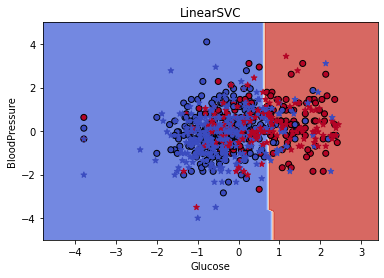

score d'entrainement: 0.7578125
score de test: 0.75


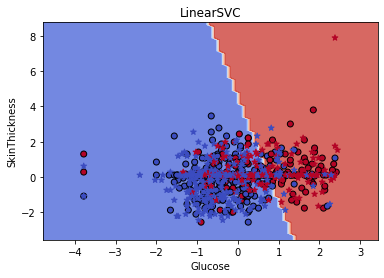

score d'entrainement: 0.7578125
score de test: 0.7526041666666666


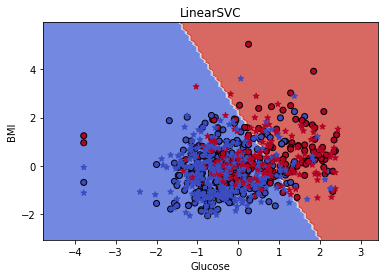

score d'entrainement: 0.7552083333333334
score de test: 0.734375


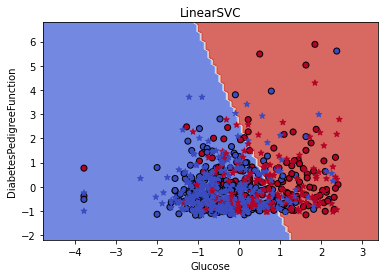

score d'entrainement: 0.7473958333333334
score de test: 0.734375


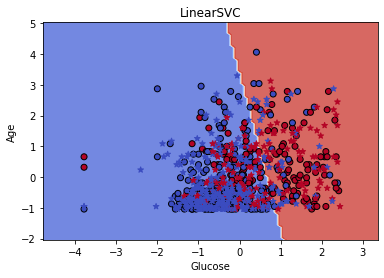

In [90]:
t = ['BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age']

for i in range(len(t)):
    X = df[['Glucose',t[i]]]
    y = df['Outcome']    
    
    #Normaliser les caractéristiques en supprimant la moyenne et en mettant à l'échelle la variance unitaire.
    scaler = StandardScaler()
    X_scale = scaler.fit_transform(X)    
    
    # On conserve 50% du jeu de données pour l'évaluation
    X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.5,random_state=0)
    C = 1.0 # paramètre de régularisation
    
    lin_svc = svm.LinearSVC(C=C, loss='hinge', random_state=0)
    lin_svc.fit(X_train, y_train)
    print("score d'entrainement:",lin_svc.score(X_train, y_train))
    print("score de test:",lin_svc.score(X_test, y_test))
    
    # Créer la surface de décision discretisée
    x_min, x_max = X_scale[:, 0].min() - 1, X_scale[:, 0].max() + 1
    y_min, y_max = X_scale[:, 1].min() - 1, X_scale[:, 1].max() + 1
    
    # Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
    h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Surface de décision
    Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    # Afficher aussi les points d'apprentissage
    plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
    plt.xlabel('Glucose')
    plt.ylabel(t[i])
    plt.title("LinearSVC")
    plt.show()

Grâce à la visualisation de la surface de décision apprise par notre modèle, nous pouvons voir que les données sont difficilement séparables linéairement. 

Essayons avec différentes valeurs du paramètre C.

**Question :**

**Testez différentes valeurs pour le paramètre C. Comment la frontière de
décision évolue en fonction de C ?**


Pour tester les différentes valeurs du paramètre C, nous avons décidé de réaliser un GridSearchCV sur les paires précédentes. Nous faisons donc varier notre paramètre C de 1 à 100 avec un pas de 5, et affichons ensuite : le meilleur score obtenu avec le paramètre C adéquat.

Score : 0.7473958333333334 
Paramètres = {'C': 76, 'random_state': 0}


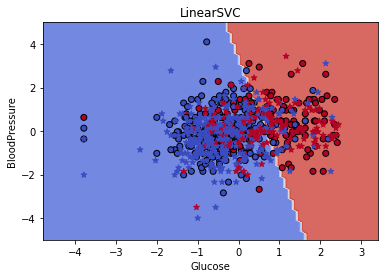

Score : 0.75 
Paramètres = {'C': 91, 'random_state': 0}


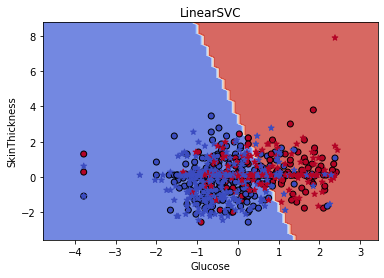

Score : 0.7630208333333334 
Paramètres = {'C': 71, 'random_state': 0}


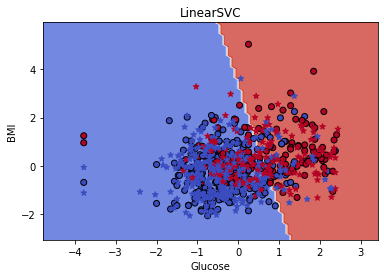

Score : 0.7447916666666666 
Paramètres = {'C': 86, 'random_state': 0}


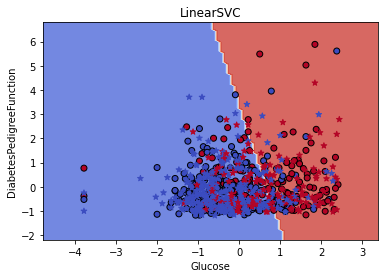

Score : 0.7473958333333334 
Paramètres = {'C': 71, 'random_state': 0}


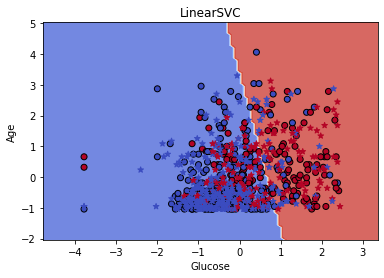

In [91]:
from sklearn.model_selection import GridSearchCV

features = ['BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age']

for feature in range(len(features)):
    X = df[['Glucose',features[feature]]]
    y = df['Outcome']
    
    scaler = StandardScaler()
    X_scale = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.5,random_state=0)    
    
    tuned_param = {"C": [i for i in range(1,100,5)],
                   "random_state":[0]}
    grid_search = GridSearchCV(svm.LinearSVC(), param_grid=tuned_param, cv=10)
    grid_search.fit(X_train, y_train)
    
    print("Score :", grid_search.best_estimator_.score(X_test, y_test), "\nParamètres =", grid_search.best_params_)

    # Créer la surface de décision discretisée
    x_min, x_max = X_scale[:, 0].min() - 1, X_scale[:, 0].max() + 1
    y_min, y_max = X_scale[:, 1].min() - 1, X_scale[:, 1].max() + 1
    
    # Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
    h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Surface de décision
    Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    # Afficher aussi les points d'apprentissage
    plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
    plt.xlabel('Glucose')
    plt.ylabel(features[feature])
    plt.title("LinearSVC")
    plt.show()

Nous pouvons voir qu'on obtient des meilleurs scores avec des grandes valeurs de C (pour la majorité).

Pour les grandes valeurs de C, l'optimiseur choisira un hyperplan à plus petite marge d'erreur, cet hyperplan parvient à mieux classer tous les points d'apprentissage.

Inversement, une très petite valeur de C amènera l'optimiseur à rechercher un hyperplan de séparation à marge d'erreur plus grande, même si cet hyperplan classe moins bien.

**Question :**

**LinearSVC() VS SVC(kernel='linear')**

Les modèles linéaires LinearSVC() et SVC(kernel='linear') produisent des résultats légèrement différents à cause du fait qu’ils optimisent des fonctions de coûts différentes mais aussi à cause du fait qu’ils gèrent les problèmes multi-classes de manière différente (linearSVC utilise One-vs-All et SVC utilise One-vs-One).

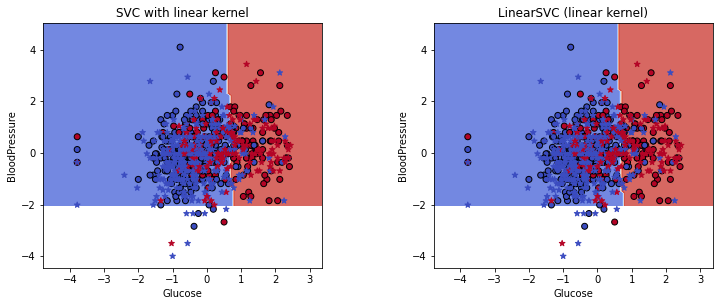

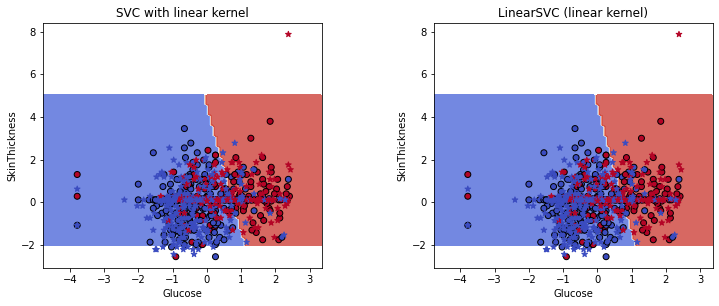

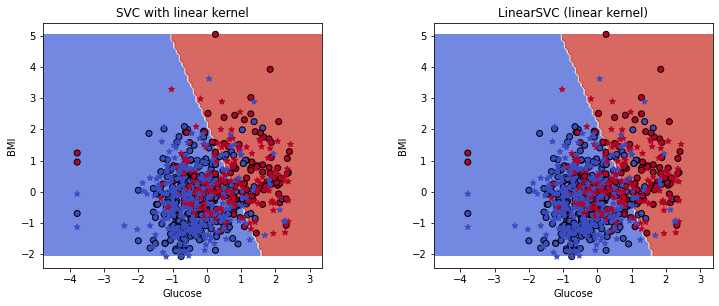

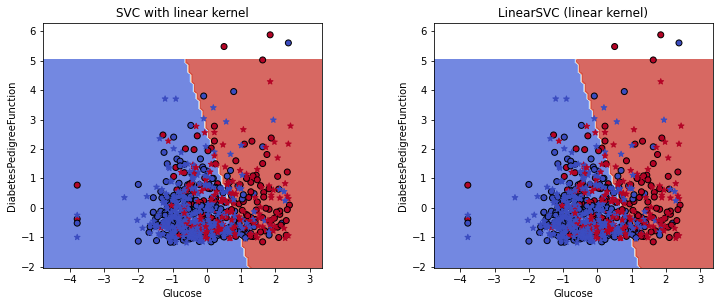

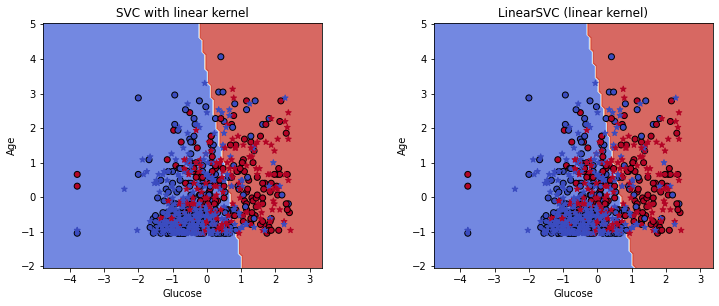

In [92]:
features = ['BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age']
for feature in range(len(features)):
    X = df[['Glucose',features[feature]]]
    y = df['Outcome']
    
    scaler = StandardScaler()
    X_scale = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.5,random_state=0)
    
    lin_svc = svm.LinearSVC(C=1.0, loss='hinge', random_state=0).fit(X_train, y_train)
    svc = svm.SVC(kernel='linear', C=1.0).fit(X_train, y_train)
    
    titles = ['SVC with linear kernel', 'LinearSVC (linear kernel)']
    
    fig = plt.figure(figsize=(12, 4.5))
    for i, clf in enumerate((svc, lin_svc)):
        plt.subplot(1, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        
        # Utiliser une palette de couleurs
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
        
        # Afficher aussi les points d'apprentissage
        plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
        plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
        plt.xlabel('Glucose')
        plt.ylabel(features[feature])
        plt.title(titles[i])
    plt.show()

**Question:**

**Réalisez l’optimisation d’une nouvelle machine à vecteur de support linéaire mais en utilisant tous attributs du jeu de données Diabetes. Le score de classification en test a-t-il augmenté ? Pourquoi ?**


In [93]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']  

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.5, random_state=0)

C = 1.0 
lin_svc = svm.LinearSVC(C=C, loss='hinge', random_state=0)
lin_svc.fit(X_train, y_train)
lin_svc.score(X_test, y_test)

0.78125

Nous pouvons voir que le résultat a augmenté. En effet, le modèle à appris sur plus de données, il est donc plus entrainé.

Cependant, nous entrainons notre modèle avec seulement 50% des données, ce qui est peu. Essayons avec 80%

In [94]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']  

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

# On conserve 20% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=0)

C = 1.0 
lin_svc = svm.LinearSVC(C=C, loss='hinge', random_state=0)
lin_svc.fit(X_train, y_train)
lin_svc.score(X_test, y_test)

0.8051948051948052

Effectivement, c'est bien mieux.

**Question**

**D’après les visualisations ci-dessus, ce modèle vous paraît-il adapté au problème ? Si non, que peut-on faire pour l’améliorer ?**

Ici, nous avons un cas où les données ne sont pas séparables linéairement, ce qui n'est pas adapté au problème. Pour améliorer on peut utiliser une technique dite de marge qui tolère les mauvais classements. De plus, la librairie scikit-learn permet de manipuler des machines à vecteurs de support avec des noyaux non-linéaires dans la classe SVC.

## SVM Non-Linéaire

Pour le SVM Non-Linéaire, nous utilisons encore la fonction SVC, mais avec ces kernels :

- 'poly' =
- 'rbf' =
- 'sigmoid' =

Pour se faire, nous coupons donc dataset en 20% de test et 80% d'apprentissage, et en standarisant les données.

In [95]:
X = df[['Glucose','BMI']]
y = df['Outcome']  

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=0)

Pour pouvoir visualiser la surface de décision, nous sélectionnons les deux meilleurs attributs (ceux avec le meilleurs score), puis nous calculons le SVM avec les trois kernels ci-dessus.

Score : 0.7662337662337663 
Paramètres = {'C': 1, 'gamma': 1, 'kernel': 'poly', 'random_state': 0}


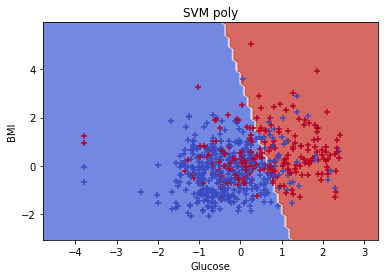

Score : 0.7922077922077922 
Paramètres = {'C': 1, 'gamma': 0.01, 'kernel': 'rbf', 'random_state': 0}


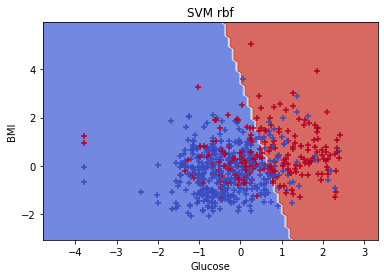

Score : 0.7922077922077922 
Paramètres = {'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid', 'random_state': 0}


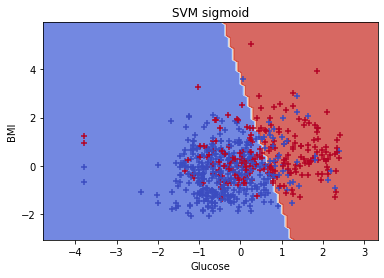

In [96]:
from sklearn.decomposition import PCA

kernels = ['poly', 'rbf', 'sigmoid']

for kernel in kernels:
    tuned_param = [{'kernel': [kernel], 
                    'gamma': ['auto', 'scale', 0.01, 0.1, 1], 
                    'C': [0.1, 1, 10, 100],
                    'random_state' : [0]}]
    grid_search = GridSearchCV(svm.SVC(), param_grid=tuned_param, cv=10)
    grid_search.fit(X_train, y_train)
    
    print("Score :", grid_search.best_estimator_.score(X_test, y_test), "\nParamètres =", grid_search.best_params_)

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    title = f'SVM {kernel}'

    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='+', cmap=plt.cm.coolwarm)
    plt.xlabel('Glucose')
    plt.ylabel('BMI')
    plt.title(title)
    plt.show()


Les scores semblent meilleurs qu'avec un SVM Linéaire. Testons avec l'intégralité des données.

In [97]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']  

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

# On conserve 20% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=0)

tuned_param = [{'kernel': ['rbf'], 
                'gamma': ['auto', 'scale', 0.01, 0.1, 1], 
                'C': [0.1, 1, 10, 100],
                'random_state' : [0]}]
grid_search = GridSearchCV(svm.SVC(), param_grid=tuned_param, cv=10)
grid_search.fit(X_train, y_train)

print("Score :", grid_search.best_estimator_.score(X_test, y_test), "\nParamètres =", grid_search.best_params_)

Score : 0.8116883116883117 
Paramètres = {'C': 1, 'gamma': 0.01, 'kernel': 'rbf', 'random_state': 0}


Nous obtenons un score légèrement supérieur au SVM Linéaire

## Conclusion
---

Support vector machine (SVM) est un modèle d'apprentissage automatique puissant et complet, capable d'effectuer des tâches de classification linéaire ou non linéaire, de régression et même de détection des aberrations. C'est l'un des modèles les plus populaires de l'apprentissage automatique. Toute personne qui s'intéresse à l'apprentissage automatique devrait en avoir un dans sa boîte à outils. Le SVM est particulièrement adapté à la classification d'ensemble de données complexes de petite et moyenne taille.